In [2]:
import numpy as np
import math
import pandas as pd
#import cPickle
import os
import glob
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import pickle

In [9]:
class CellState:
    def __init__(self, ID):
        self.rnaamt = []
        self.geneamt = []
        self.growthRate = []
        self.ID = ID
        
x = np.linspace(0, 10, 11)
cells = [CellState(i) for i in x]

for cell in cells:
    print(cell.ID)
    cell.growthRate = 1
    cell.rnaamt = 0
    cell.geneamt = 0
    #print(cell.rnaamt)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


In [10]:
df = pd.DataFrame()
for cell in cells: # protein production from 0 to 10 hours
    pr1 = 1.5
    dr1 = .3
    pp1 = 1.4
    dp1 = 1
    time = np.linspace(0, 10, 11)
    for i in time:
        #print(i)
        df2 = {'ID':cell.ID, 'RNA':cell.rnaamt, 'protein':cell.geneamt, 'growthRate':cell.growthRate, 'time':i}
        cell.rnaamt = cell.rnaamt + (pr1 * cell.growthRate) - (dr1 * cell.rnaamt * cell.growthRate) #Euo RNA
        cell.geneamt = cell.geneamt + (pp1 * cell.growthRate * cell.rnaamt) - (dp1 * cell.growthRate * cell.geneamt) #Euo 
        cell.growthRate = cell.growthRate * np.random.normal(1, 0.1)
        df = df.append(df2, ignore_index = True)

for cell in cells: #protein degredatoin from 11 to 30 hours
    time = np.linspace(11, 30, 20)
    pp1 = 0
    dp1 = .12
    for i in time:
        #print(i)
        cell.geneamt = cell.geneamt + (pp1 * cell.growthRate * cell.rnaamt) - (dp1 * cell.growthRate * cell.geneamt) #Euo 
        cell.growthRate = cell.growthRate * np.random.normal(1, 0.1)
        df3 = {'ID':cell.ID, 'RNA':cell.rnaamt, 'protein':cell.geneamt, 'growthRate':cell.growthRate, 'time':i}
        df = df.append(df3, ignore_index = True)

<IPython.core.display.Javascript object>


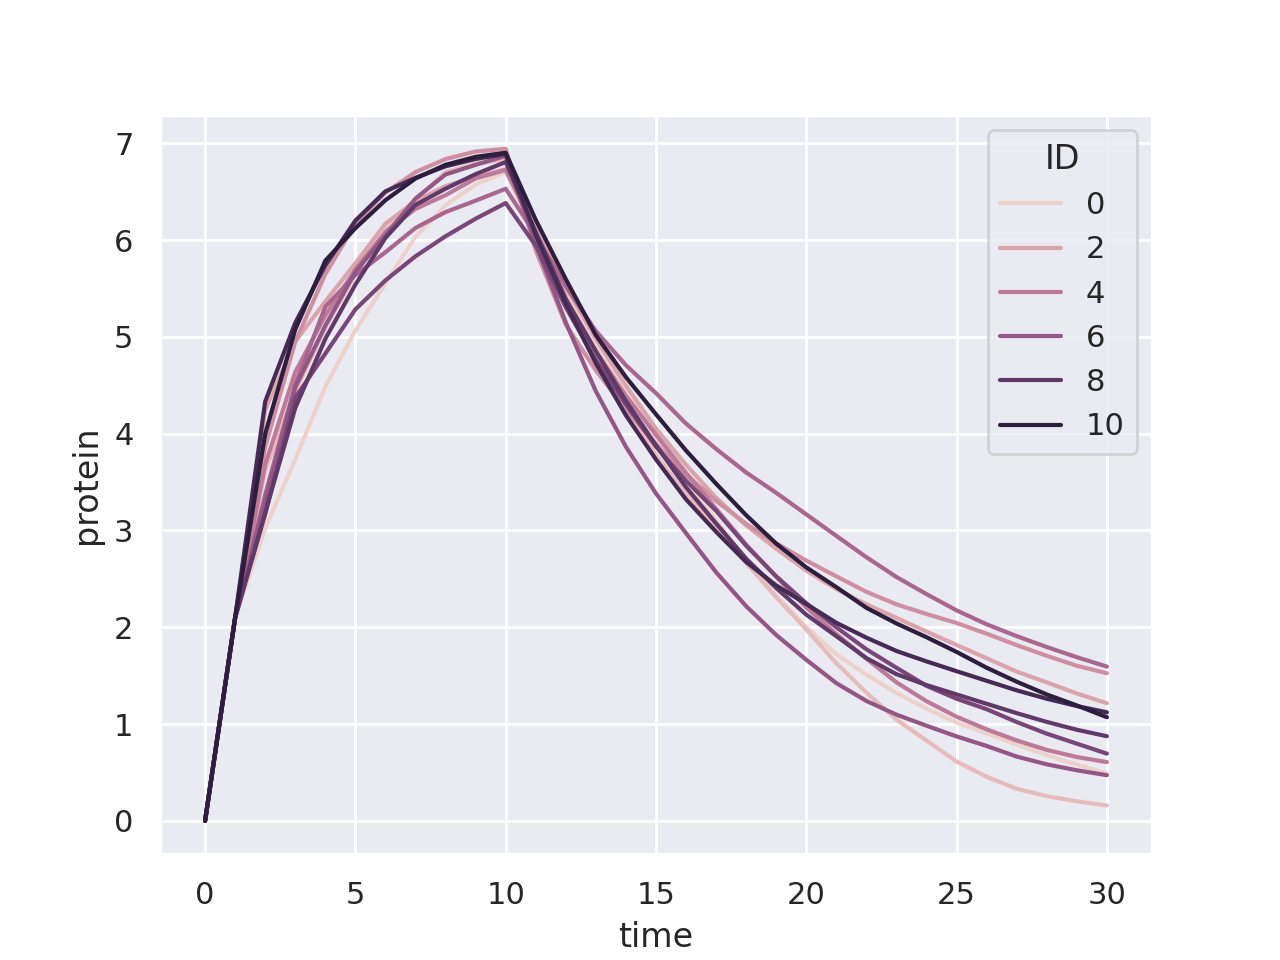

<AxesSubplot:xlabel='time', ylabel='protein'>

In [11]:
sns.lineplot(x='time', y='[protein]', hue='ID', data=df)